# 1-1 선 그래프
* 연속하는 데이터 값들을 직선 또는 곡선으로 연결하여 데이터 값 사이의 관계를 나타낸다.
* 연속적인 값의 변화와 패턴을 파악하는데 적합
* ex) 시계열 데이터 :  일정한 시간동안 수집 된 일련의 순차적으로 정해진 데이터 셋의 집합

In [49]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel('시도별 전출입 인구수.xlsx', engine = 'openpyxl', header = 0)
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [51]:
# 누락값(NaN)을 앞 데이터로 채움
df = df.fillna(method = 'ffill')
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [52]:
# '전출지별'에서 '서울특별시'라는 값을 갖는 데이터만 추출하여 df_seoul에 저장
# 서울에서 다른 지역으로 전출(이동)하는 데이터만 남는다.
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1) # '전출지별' 열 삭제
df_seoul.head(8)

,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
21,부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
25,대전광역시,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
26,울산광역시,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
27,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813


In [53]:
# '전입지별' 열의 이름을 '전입지'로 바꾼다.
# '전입지' 열을 df_seoul의 행 인덱스로 지정
df_seoul.rename({'전입지별' : '전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)
df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [57]:
# df_seoul에서 '전입지'가 '경기도'인 행 데이터를 선택하여 sr_one에 저장
# 서울에서 경기도로 이동한 인구 데이터를 나타낸다.
sr_one = df_seoul.loc['경기도',] # 행단위 데이터
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

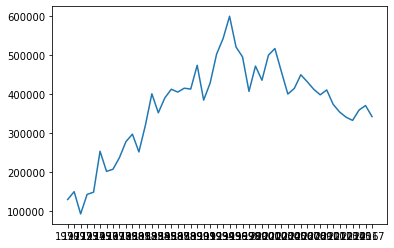

In [58]:
# 선 그래프 그리는 plot() 함수 사용
# 시리즈의 인덱스를 x축 데이터로, 데이터 값을 y축 데이터로 설정
plt.plot(sr_one.index, sr_one.values)

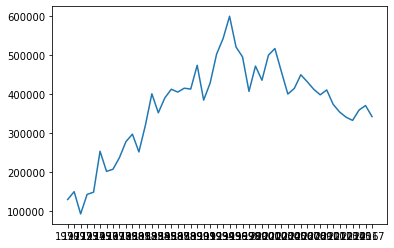

In [60]:
# 시리즈 또는 데이터프레임 객체를 plot()함수에 직접 입력하는 것도 가능
plt.plot(sr_one)

### 차트 제목, 축 이름 추가
* title() : 차트 제목 추가
* xlabel() : x축 이름
* ylabel() : y축 이름

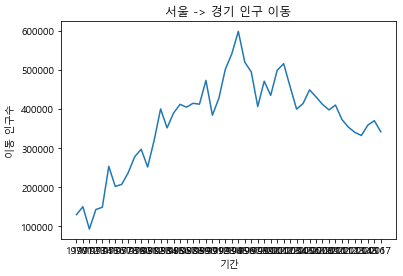

In [74]:
plt.plot(sr_one.index, sr_one.values)

# 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()

### Matplotlib 한글 폰트 오류 해결

In [73]:
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"  # 폰트 파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)

* ※맥 OS 사용시
from matplotlib import rc
rc('font', family = 'AppleGothic')

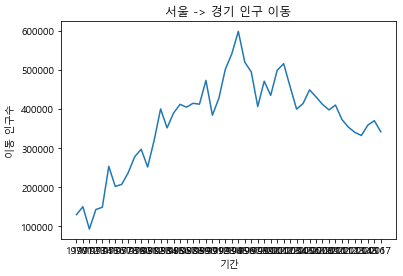

In [77]:
plt.plot(sr_one.index, sr_one.values)

# 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()

### 그래프 꾸미기
* figure() : 차트 사이즈 설정
* xticks() : x축 눈금 라벨을 반시계 방향으로 회전(글씨 겹치지 않게)

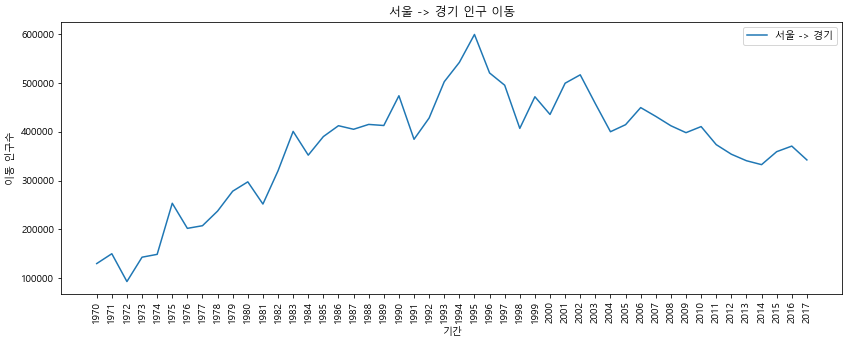

In [81]:
# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize = (14, 5))

# x축 눈금 라벨 회전
plt.xticks(rotation = 'vertical') # 반시계 방향으로 90도 회전


plt.plot(sr_one.index, sr_one.values)
plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

# 범례 표시
plt.legend(labels = ['서울 -> 경기'], loc = 'best')

plt.show()

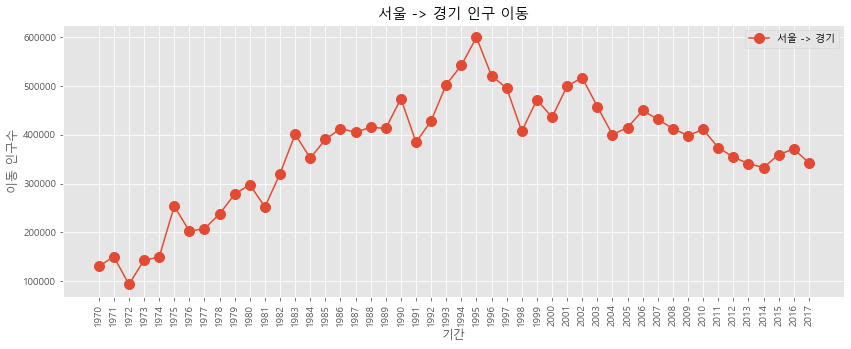

In [85]:
# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize = (14, 5))

# x축 눈금 라벨 회전
plt.xticks(size = 10, rotation = 'vertical') # 폰트 크기 10으로 설정


plt.plot(sr_one.index, sr_one.values, marker = 'o', markersize = 10) # 마커 표시 추가
plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

# 범례 표시
plt.legend(labels = ['서울 -> 경기'], loc = 'best')

plt.show()

In [86]:
# Matplotlib 스타일 리스트 출력
print(plt.style.available)

# 참조 : https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### 주석
* annotate() : 주석 내용을 넣을 위치와 정렬 방법 등을 전달
    * arrowprops 옵션 : 텍스트 대신 화살표 표시. 화살표 스타일, 시작점과 끝점의 좌표 입력
    * rotation 옵션 : 양(+)의 회전 방향은 반시계 방향
    * va 옵션 : 글자를 위아래 세로 방향으로 정렬. 'center', 'top', 'bottom', 'baseline'
    * ha 옵션 : 좌우 가로 방향으로 정렬. 'center', 'left', 'right'
    
* 참조 : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html

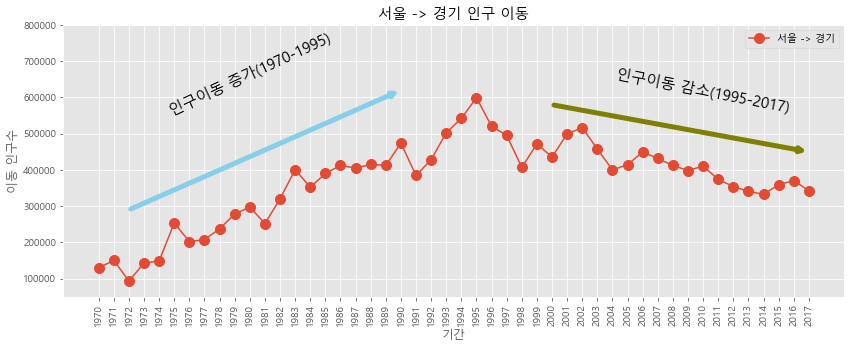

In [91]:
# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize = (14, 5))

# x축 눈금 라벨 회전
plt.xticks(size = 10, rotation = 'vertical') # 폰트 크기 10으로 설정


plt.plot(sr_one.index, sr_one.values, marker = 'o', markersize = 10) # 마커 표시 추가
plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

# 범례 표시
plt.legend(labels = ['서울 -> 경기'], loc = 'best')

#-------------------------------------------------------------

# y축 범위 지정(최소값, 최대값)
# 주석을 넣을 여백 공간을 충분히 확보하기 위해 y축 범위를 늘려준다.
plt.ylim(50000, 800000)

# 주석 표시 - 화살표
plt.annotate('',
            xy = (20, 620000),          # 화살표의 머리 부분(끝점). x값- 인덱스번호 20, y값 - 620000명
            xytext = (2, 290000),      # 화살표의 꼬리 부분(시작점)
            xycoords = 'data',          # 좌표체계
            arrowprops = dict(arrowstyle = '->', color = 'skyblue', lw = 5),
            )
plt.annotate('',
             xy=(47, 450000),       #화살표의 머리 부분(끝점)
             xytext=(30, 580000),   #화살표의 꼬리 부분(시작점)
             xycoords='data',       #좌표체계
             arrowprops=dict(arrowstyle='->', color='olive', lw=5),  #화살표 서식
             )

# 주석 표시 - 텍스트
plt.annotate('인구이동 증가(1970-1995)',  #텍스트 입력
             xy=(10, 550000),            #텍스트 위치 기준점
             rotation=25,                #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
             )

plt.annotate('인구이동 감소(1995-2017)',  #텍스트 입력
             xy=(40, 560000),            #텍스트 위치 기준점
             rotation=-11,               #텍스트 회전각도
             va='baseline',              #텍스트 상하 정렬
             ha='center',                #텍스트 좌우 정렬
             fontsize=15,                #텍스트 크기
             )

plt.show()

### 화면 분할하여 그래프 여러 개 그리기 - axe 객체 활용
* 여러 개의 axe 객체를 만들고, 분할된 화면마다 axe 객체를 하나씩 배정
* axe 객체는 각각 서로 다른 그래프를 표현할 수 있다.
* axe 객체를 1개만 생성하는 경우에는 하나의 그래프만 표시된다.

C:\Users\APF_TE~1\AppData\Local\Temp/ipykernel_6748/1567855158.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation = 75)
C:\Users\APF_TE~1\AppData\Local\Temp/ipykernel_6748/1567855158.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation = 75)


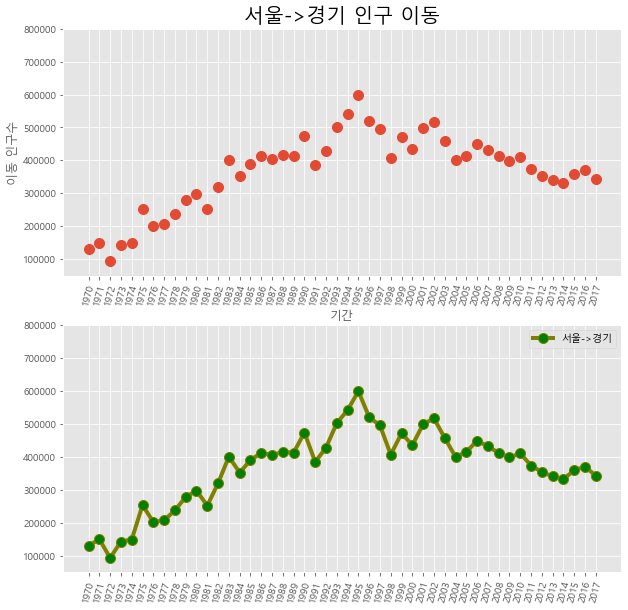

In [99]:
# figure() : 그래프를 그리는 그림틀(fig) 생성
# figsize 옵션으로 그림틀의 크기 설정
# fig 객체에 add_supblot() 메소드를 적용하여 그림틀을 여러 개로 분할
# 이 때 나눠진 각 부분을 axe 객체라고 부른다.
# add_subplot(행의 크기, 열의 크기, 서브플롯순서)
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# 각 axe 객체에 plot() 적용하여 그래프 출력
ax1.plot(sr_one, 'o', markersize = 10)
ax2.plot(sr_one, marker = 'o', markerfacecolor = 'green', markersize = 10,
         color = 'olive', linewidth = 4, label = '서울->경기')
ax2.legend(loc = 'best')

# y축 범위 지정(최소값, 최대값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 차트 제목 추가
ax1.set_title('서울->경기 인구 이동', size = 20)

# 축 이름 추가
ax1.set_xlabel('기간', size = 12)
ax1.set_ylabel('이동 인구수', size = 12)


# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation = 75)
ax2.set_xticklabels(sr_one.index, rotation = 75)

plt.show()

C:\Users\APF_TE~1\AppData\Local\Temp/ipykernel_6748/23943660.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation=90)


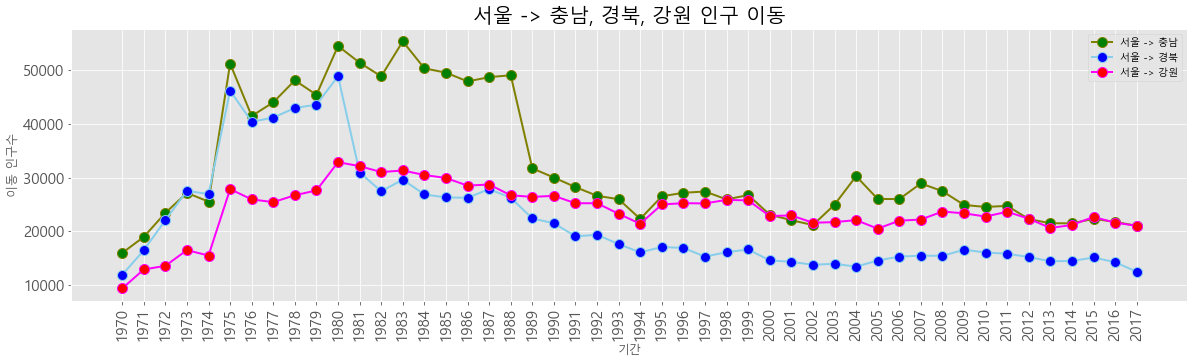

In [105]:
# 동일한 그림(axe 객체)에 여러 개의 그래프를 추가하는 것도 가능

# 서울에서 '충청남도','경상북도', '강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도','경상북도', '강원도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot') 

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 5))   
ax = fig.add_subplot(1, 1, 1)

# axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green', 
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='blue', 
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='red', 
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')

# 범례 표시
ax.legend(loc='best')

# 차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=20)

# 축이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size = 12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years, rotation=90)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)

plt.show()

* 지리적으로 서울과 가까운 충남 지역으로 이동한 인구가 달느 두 지역에 비해 많은 편이다.
* 전반적으로 1970~80년대에는 서울에서 지방으로 전출하느 인구가 많았으나
* 1990년 이후로는 감소하는 패턴을 보이고 있다.

C:\Users\APF_TE~1\AppData\Local\Temp/ipykernel_6748/722630315.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation=90)
C:\Users\APF_TE~1\AppData\Local\Temp/ipykernel_6748/722630315.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation=90)
C:\Users\APF_TE~1\AppData\Local\Temp/ipykernel_6748/722630315.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation=90)
C:\Users\APF_TE~1\AppData\Local\Temp/ipykernel_6748/722630315.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation=90)


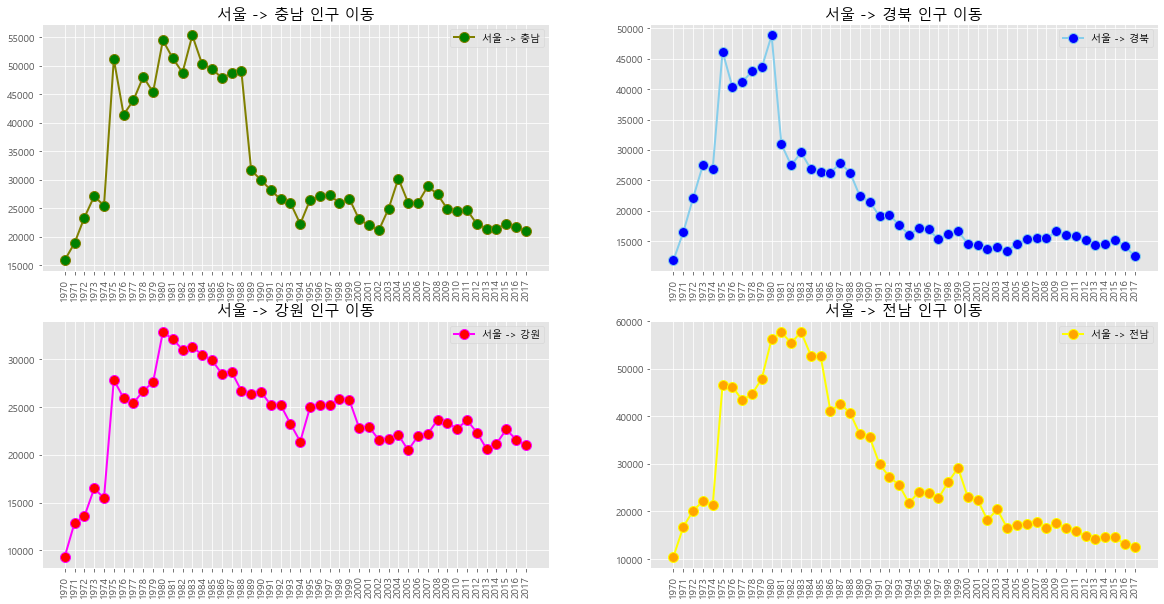

In [106]:
# 4개의 axe 객체 생성
# 각 지역(충청남도, 경상북도, 강원도, 전라남도)으로 이동한 인구 변화 그래프
# 각 지역에 해당하는 4개의 행을 선택하고, axe 객체에 하나씩 plot() 메소드 적용
# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]

# 스타일 서식 지정
plt.style.use('ggplot') 

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 10))   
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(col_years, df_4.loc['충청남도',:], marker='o', markerfacecolor='green', 
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax2.plot(col_years, df_4.loc['경상북도',:], marker='o', markerfacecolor='blue', 
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax3.plot(col_years, df_4.loc['강원도',:], marker='o', markerfacecolor='red', 
        markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')
ax4.plot(col_years, df_4.loc['전라남도',:], marker='o', markerfacecolor='orange', 
        markersize=10, color='yellow', linewidth=2, label='서울 -> 전남')

# 범례 표시
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

# 차트 제목 추가
ax1.set_title('서울 -> 충남 인구 이동', size=15)
ax2.set_title('서울 -> 경북 인구 이동', size=15)
ax3.set_title('서울 -> 강원 인구 이동', size=15)
ax4.set_title('서울 -> 전남 인구 이동', size=15)

# 축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show()